In [27]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

In [2]:
import pandas as pd
data = pd.read_excel("/content/GP2F.xlsx")

In [ ]:
data.head()

,PatientID,InsuranceType,Age,Gender,Bacteria,SpecimenType,SensitivityResult,AdmissionPeriod,Hospital,DiagnosisDateTime,Antibiotics,AdministrationMethod,Dosage,Prescription,StartDate,End date,TreatmentTime,Antibiotic_Family,City
0,12332,0,52,f,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
1,12332,0,52,f,Pseudomonas aeruginosa,Vagina,S,15,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
2,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
3,12332,0,52,m,Klebsiella oxytoca,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman
4,12332,0,52,m,Escherichia coli,Sputum,S,11,Prince Hamzah Hospital,2011-01-27,VANCOMYCIN HCL 500MG/VIAL INJ,INTRAVENOUS,500MG/1IL,Q24H,2018-02-07,2018-02-08,1,Glycopeptides,Amman


In [ ]:
data.isnull().sum()

PatientID               0
InsuranceType           0
Age                     0
Gender                  0
Bacteria                0
SpecimenType            0
SensitivityResult       0
AdmissionPeriod         0
Hospital                0
DiagnosisDateTime       0
Antibiotics             0
AdministrationMethod    0
Dosage                  0
Prescription            0
StartDate               0
End date                0
TreatmentTime           0
Antibiotic_Family       0
City                    0
dtype: int64

In [ ]:
data['Antibiotics'].value_counts()

Antibiotics
VANCOMYCIN HCL 500MG/VIAL INJ     96205
AZITHROMYCIN 200MG/5ML SUSP,OR    23847
CEFAZOLIN SOD 1GM/VIAL INJ [A]    10403
CEFTRIAXONE SODIUM 250MG/VIAL      3208
CEFTIZOXIME 1GM/VIAL INJ [W]       2261
CEFUROXIME AXETIL 125MG/5ML SU     1009
LINEZOLID 2MG/ML INJ [R]            679
CEFAZOLIN SOD 2GM/VIAL INJ [A]      511
TINZAPARIN 14000 IU 0.7ML SYRI      481
AMOXICILLIN 250/CLAVULAN 125 T      427
IMMUNE GLOBULIN 1GM/VIAL INJ        159
LEVOFLOXACIN 250MG TAB,ORAL          76
AMIKACIN 250MG/VIAL INJ [A]          70
AMPICILLIN 500MG CAP [A]             43
LINCOMYCIN 600MG/VIAL INJ [W]        25
FLUCLOXACILLIN 500MG INJ [A]         18
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139422 entries, 0 to 139421
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   PatientID             139422 non-null  int64         
 1   InsuranceType         139422 non-null  object        
 2   Age                   139422 non-null  int64         
 3   Gender                139422 non-null  object        
 4   Bacteria              139422 non-null  object        
 5   SpecimenType          139422 non-null  object        
 6   SensitivityResult     139422 non-null  object        
 7   AdmissionPeriod       139422 non-null  int64         
 8   Hospital              139422 non-null  object        
 9   DiagnosisDateTime     139422 non-null  datetime64[ns]
 10  Antibiotics           139422 non-null  object        
 11  AdministrationMethod  139422 non-null  object        
 12  Dosage                139422 non-null  object        
 13 

In [ ]:
data['Bacteria'].value_counts()

Bacteria
Escherichia coli                                   39744
Klebsiella pneumoniae                              28538
Pseudomonas aeruginosa                             13644
Staphylococcus (coagulase-negative)                12575
Acinetobacter baumannii                            10445
Enterobacter cloacae                               10407
Staphylococcus aureus                              10168
Serratia marcescens                                 2468
Proteus mirabilis                                   2008
Enterococcus spp.                                   1601
Enterococcus faecalis                                942
Citrobacter freundii                                 903
Klebsiella oxytoca                                   692
Proteus spp.                                         647
Streptococcus spp. (Group Viridans α-hemolysis)      590
Streptococcus agalactiae (Group B β-hemolysis)       562
Klebsiella aerogenes                                 553
Morganella morganii   

In [ ]:
data['AdmissionPeriod'].nunique()

118

In [ ]:
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides       96205
Macrolides          23847
Cephalosporins      17392
Oxazolidinones        679
Penicillins           488
Anticoagulants        481
Immunoglobulins       159
Fluoroquinolones       76
Aminoglycosides        70
Lincosamides           25
Name: count, dtype: int64

In [28]:
data = pd.DataFrame(data)
# List of values to remove from the DataFrame
values_to_remove = ['Lincosamides', 'Aminoglycosides', 'Fluoroquinolones', 'Immunoglobulins']
data = data[~data.isin(values_to_remove).any(axis=1)]
data['Antibiotic_Family'].value_counts()

Antibiotic_Family
Glycopeptides     96205
Macrolides        23847
Cephalosporins    17392
Oxazolidinones      679
Penicillins         488
Anticoagulants      481
Name: count, dtype: int64

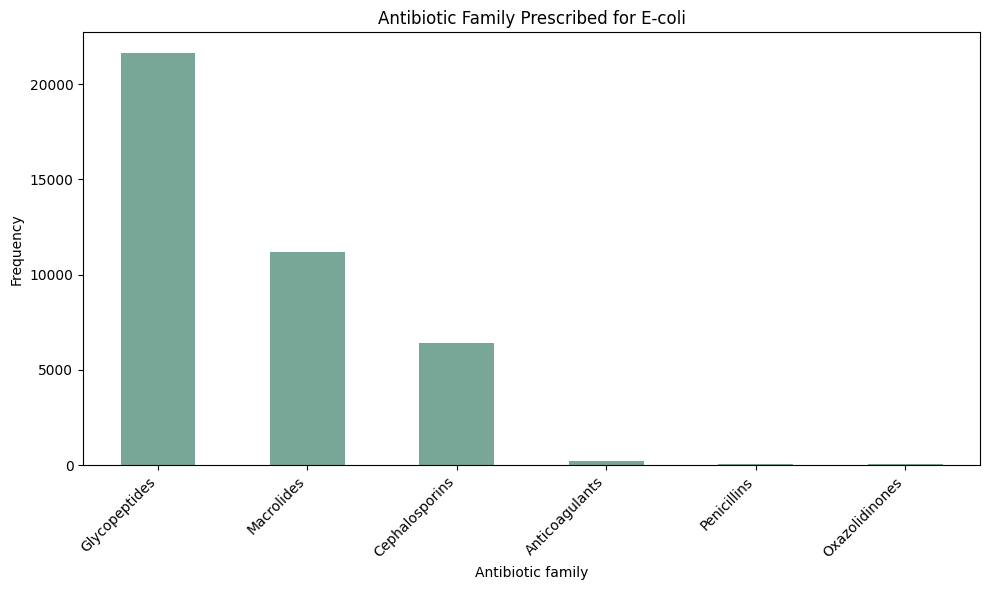

In [ ]:
ECOLI_df = data[data['Bacteria'] == 'Escherichia coli']
bacteria_counts = ECOLI_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#78a798')
plt.title('Antibiotic Family Prescribed for E-coli')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

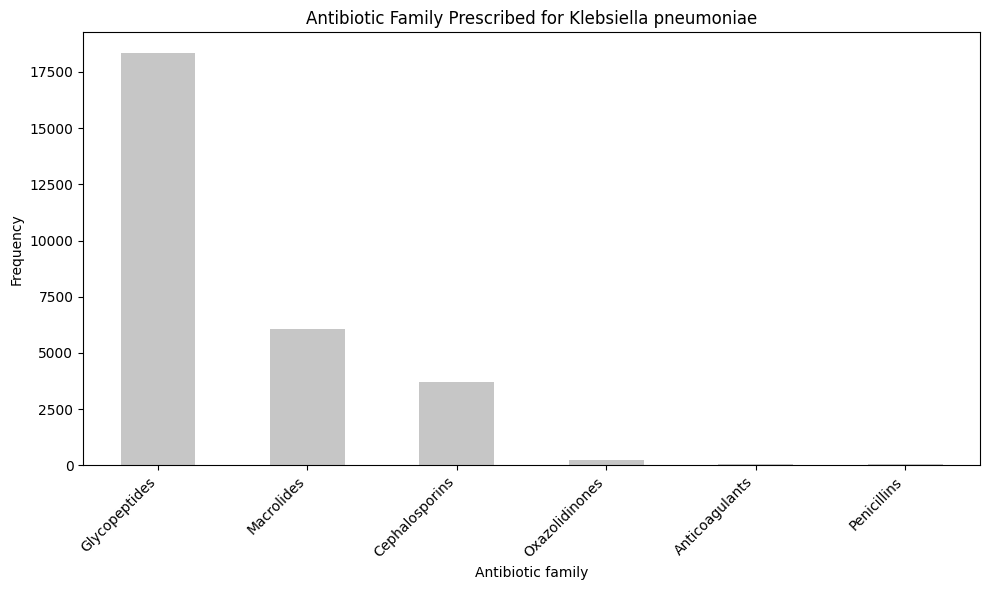

In [ ]:
klebsi_df = data[data['Bacteria'] == 'Klebsiella pneumoniae']
bacteria_counts = klebsi_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#c6c6c6')
plt.title('Antibiotic Family Prescribed for Klebsiella pneumoniae')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


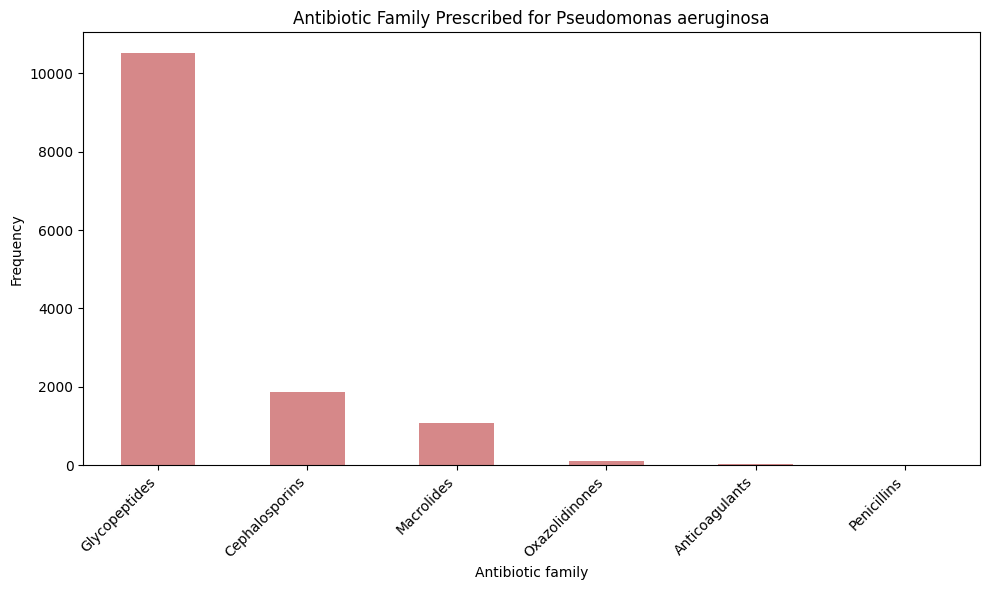

In [ ]:
ps_df = data[data['Bacteria'] == 'Pseudomonas aeruginosa']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#d68889')
plt.title('Antibiotic Family Prescribed for Pseudomonas aeruginosa')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

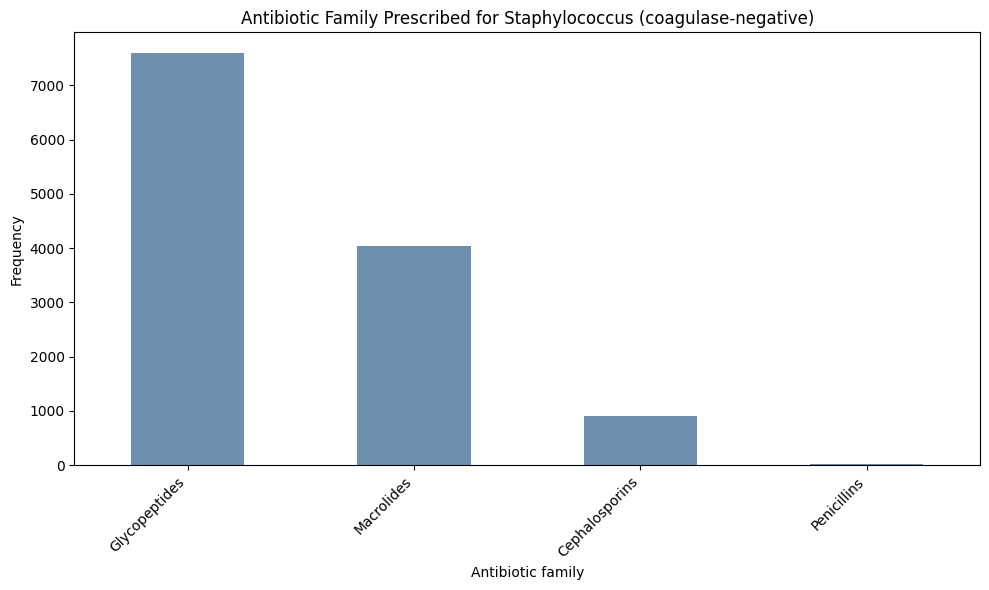

In [ ]:
ps_df = data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#6F8FAF')
plt.title('Antibiotic Family Prescribed for Staphylococcus (coagulase-negative)')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

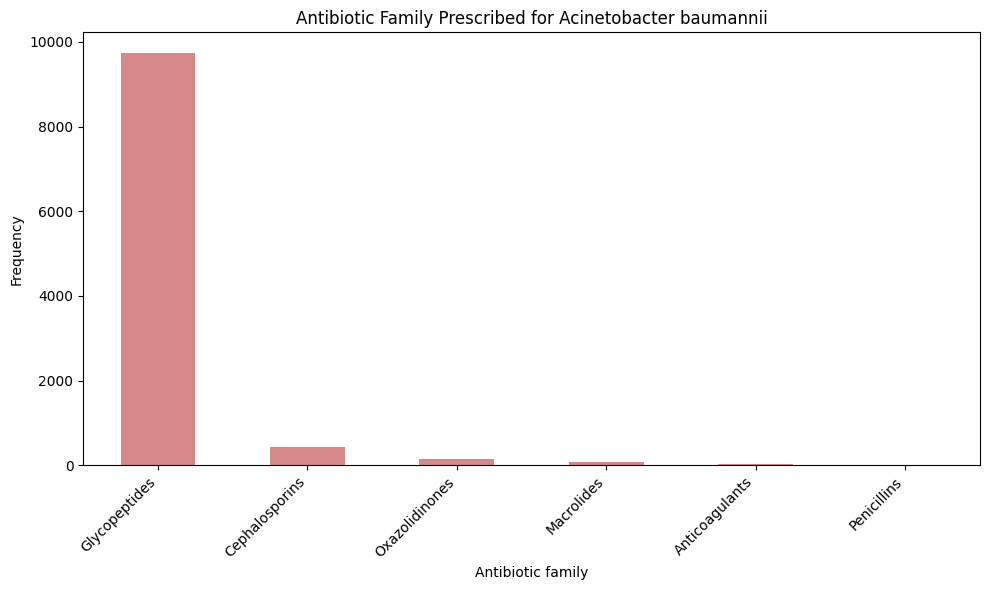

In [ ]:
ps_df = data[data['Bacteria'] == 'Acinetobacter baumannii']
bacteria_counts = ps_df['Antibiotic_Family'].value_counts()
plt.figure(figsize=(10, 6))
bacteria_counts.plot(kind='bar', color='#d68889')
plt.title('Antibiotic Family Prescribed for Acinetobacter baumannii')
plt.xlabel('Antibiotic family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
data=data.drop(['End date',"StartDate",'DiagnosisDateTime','PatientID','Hospital','City','AdmissionPeriod','Prescription','TreatmentTime','Antibiotics','InsuranceType'],axis=1)

##**Escherichia coli**

In [ ]:
data['SensitivityResult'].value_counts()

SensitivityResult
S    90718
R    48374
Name: count, dtype: int64

In [ ]:
data_g = data[data['Bacteria'] == 'Escherichia coli']
df = pd.DataFrame(data_g)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins', 'Oxazolidinones']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


SensitivityResult
S    24409
R    14840
Name: count, dtype: int64
Cross-validation scores: [0.90968153 0.91923567 0.90917197 0.91757962 0.91502102]
Mean accuracy: 0.9141
Standard deviation of scores: 0.0041
Accuracy on unseen test data: 0.9138853503184713
Confusion matrix:
 [[2619  349]
 [ 327 4555]]
Precision: 0.9288336052202284
Recall: 0.9330192544039329
F1-score: 0.9309217249131413
Sensitivity: 0.9330192544039329
Specificity: 0.8824123989218329
AuROC: 0.9663610741808567
Matthews Correlation Coefficient (MCC): 0.8166327630012366


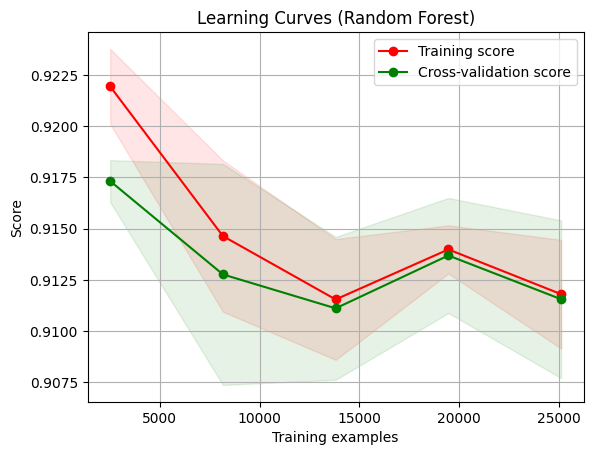

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(random_forest, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


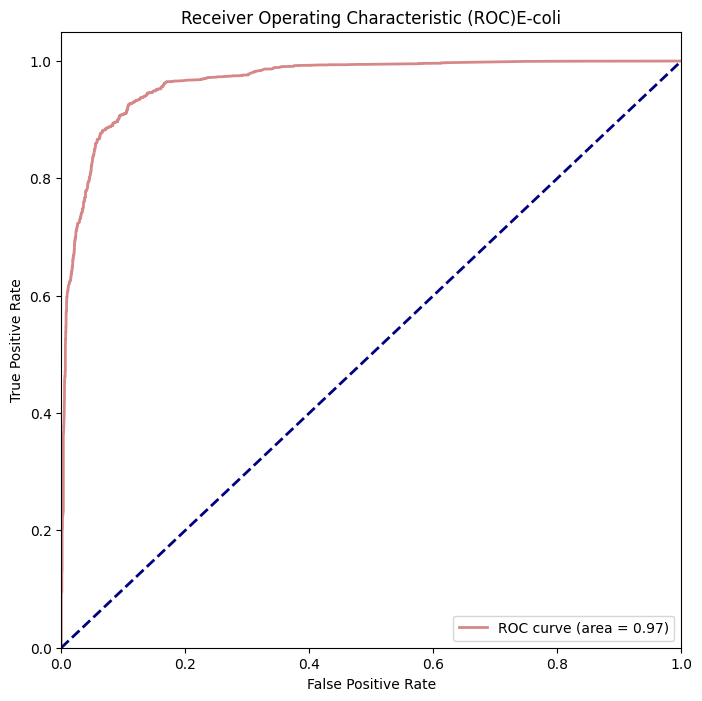

Area Under the Curve (AUC): 0.9662949536525347


In [ ]:
y_train_proba = cross_val_predict(random_forest, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)E-coli')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

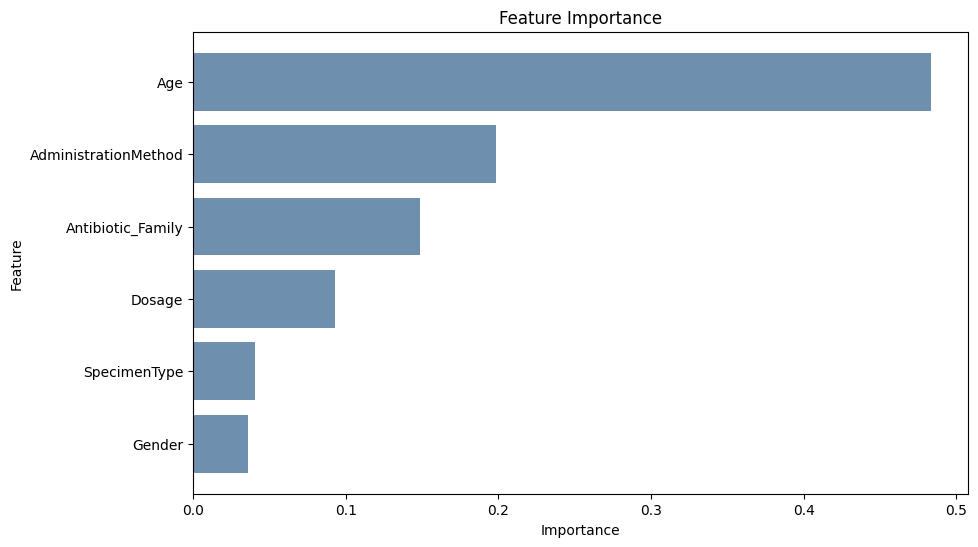

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


In [ ]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame with feature names and their importances
print(feature_importance_df)

                Feature  Importance
0                   Age    0.483513
3  AdministrationMethod    0.198541
5     Antibiotic_Family    0.148908
4                Dosage    0.092778
2          SpecimenType    0.040606
1                Gender    0.035653


## **Klebsiella pneumoniae**

In [ ]:
es_df = data[data['Bacteria'] == 'Klebsiella pneumoniae']
bacteria_counts_c = es_df['Antibiotic_Family'].value_counts()
print(bacteria_counts_c)

Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Anticoagulants       73
Penicillins          52
Name: count, dtype: int64


In [ ]:
data_k = data[data['Bacteria'] == 'Klebsiella pneumoniae']
df = pd.DataFrame(data_k)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)


# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)


SensitivityResult
S    23010
R     5342
Name: count, dtype: int64


<ipython-input-24-809beb8af0dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-24-809beb8af0dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-24-809beb8af0dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Cross-validation scores: [0.90953976 0.91782754 0.8984127  0.91375661 0.91604938]
Mean accuracy: 0.9111
Standard deviation of scores: 0.0069
Accuracy on unseen test data: 0.9100687709398695
Confusion matrix:
 [[ 589  480]
 [  30 4572]]
Precision: 0.9049881235154394
Recall: 0.9934810951760105
F1-score: 0.9471721566190181
Sensitivity: 0.9934810951760105
Specificity: 0.5509822263797942
AuROC: 0.9580136386790791
Matthews Correlation Coefficient (MCC): 0.6828947793672089


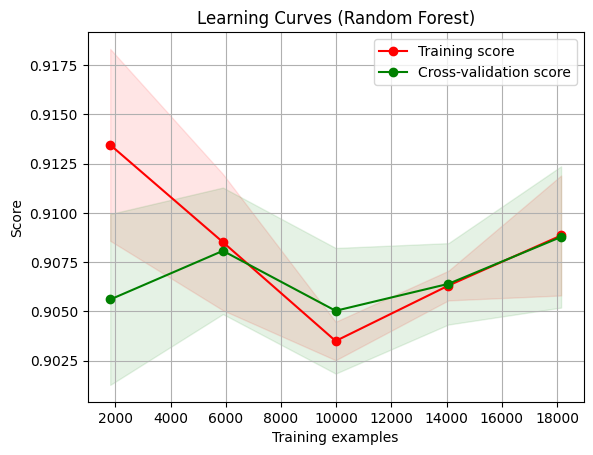

In [ ]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(random_forest, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


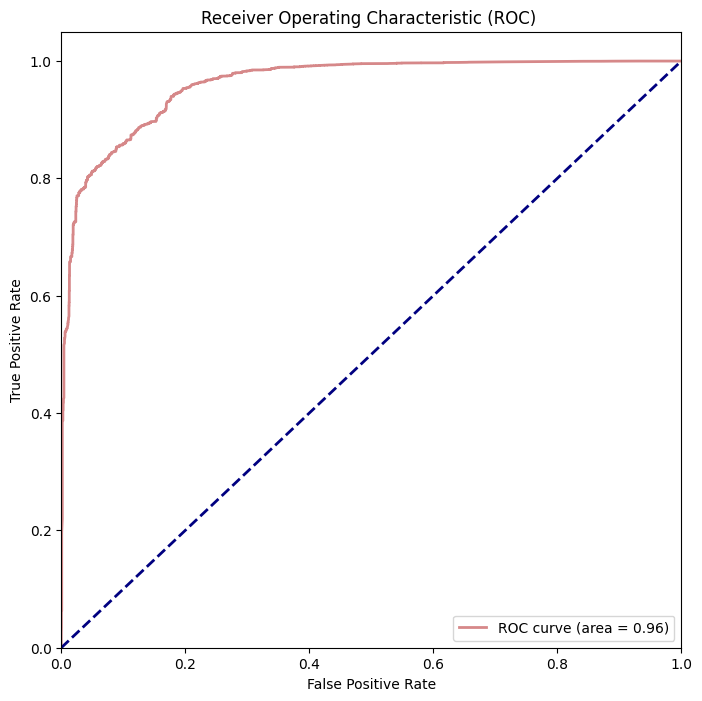

Area Under the Curve (AUC): 0.9610158278337861


In [ ]:
y_train_proba = cross_val_predict(random_forest, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) ')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

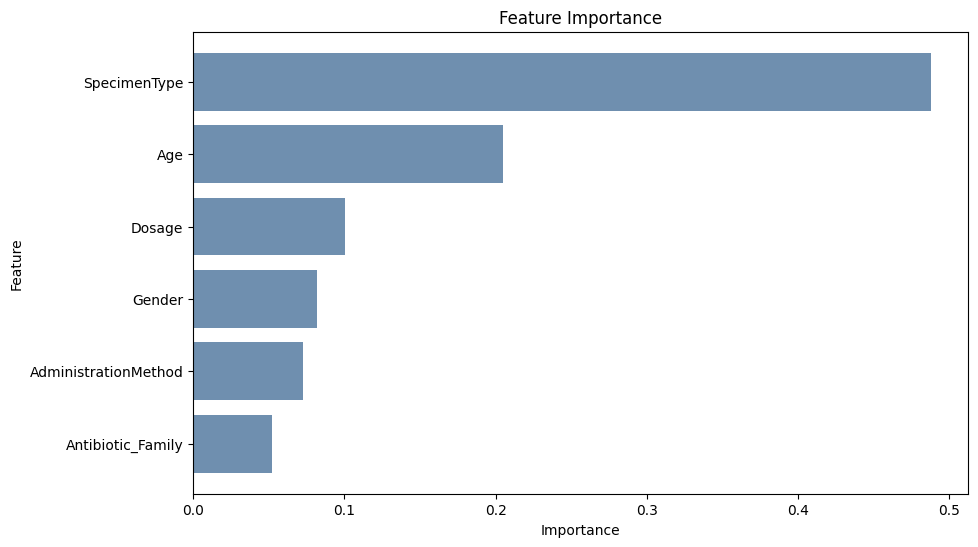

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


## **Pseudomonas aeruginosa**

In [ ]:
data_p = data[data['Bacteria'] == 'Pseudomonas aeruginosa']
df = pd.DataFrame(data_p)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins', 'Oxazolidinones']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)



SensitivityResult
S    11082
R     2391
Name: count, dtype: int64
Cross-validation scores: [0.91020408 0.91502783 0.91651206 0.9138827  0.91573868]
Mean accuracy: 0.9143
Standard deviation of scores: 0.0022
Accuracy on unseen test data: 0.913543599257885
Confusion matrix:
 [[ 249  229]
 [   4 2213]]
Precision: 0.9062244062244063
Recall: 0.9981957600360848
F1-score: 0.9499892680832795
Sensitivity: 0.9981957600360848
Specificity: 0.5209205020920502
AuROC: 0.9630588472869401
Matthews Correlation Coefficient (MCC): 0.679873852030839


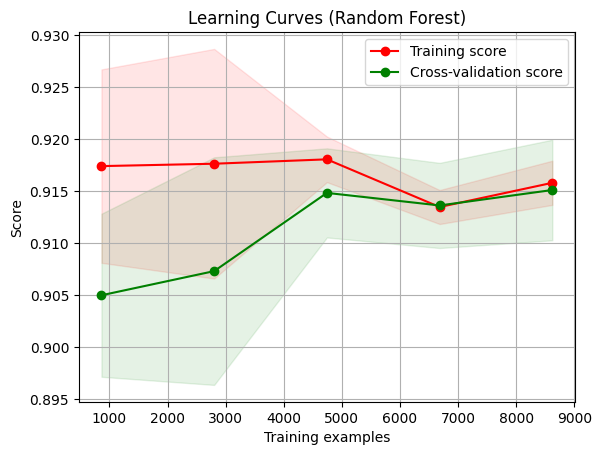

In [ ]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(random_forest, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


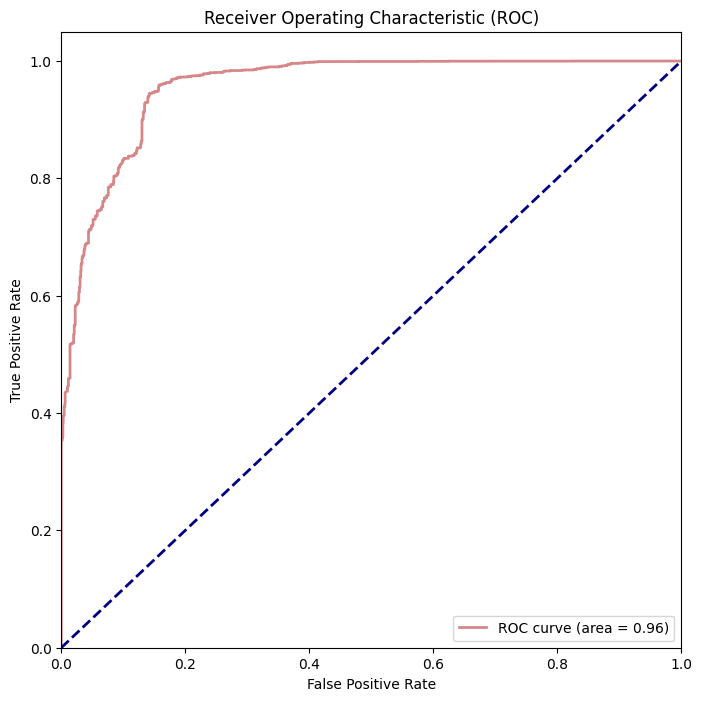

Area Under the Curve (AUC): 0.9562370918366896


In [ ]:
y_train_proba = cross_val_predict(random_forest, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

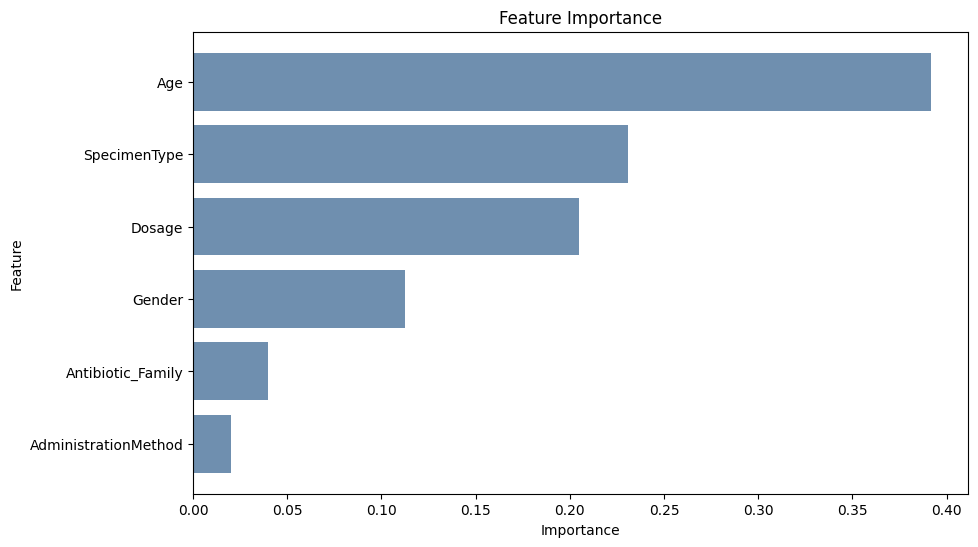

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Staphylococcus (coagulase-negative)**

In [ ]:
data_st = data[data['Bacteria'] == 'Staphylococcus (coagulase-negative)']
df = pd.DataFrame(data_st)
df = df.applymap(str)

values_to_remove = ['Anticoagulants', 'Penicillins','Oxazolidinones']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']

"""
# Oversample both classes
#sampling_strategy={0: 67427, 1: 67427},
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target back to the DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'SensitivityResult': y_resampled})], axis=1)

# Check the class distribution after resampling
print(df_resampled['SensitivityResult'].value_counts())
print(y_resampled.value_counts())
#print(X_resampled.value_counts())

"""
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    8706
S    3842
Name: count, dtype: int64
Cross-validation scores: [0.92629482 0.93625498 0.93984064 0.93184536 0.93104823]
Mean accuracy: 0.9331
Standard deviation of scores: 0.0046
Accuracy on unseen test data: 0.9306772908366534
Confusion matrix:
 [[1670   71]
 [ 103  666]]
Precision: 0.903663500678426
Recall: 0.8660598179453837
F1-score: 0.8844621513944224
Sensitivity: 0.8660598179453837
Specificity: 0.9592188397472717
AuROC: 0.9829022227633254
Matthews Correlation Coefficient (MCC): 0.8353626581593231


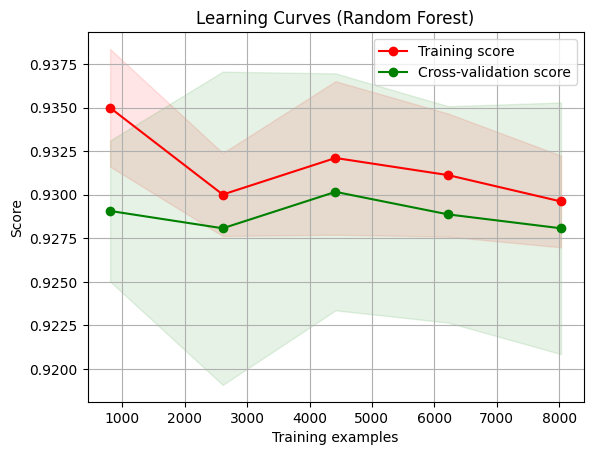

In [ ]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(random_forest, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


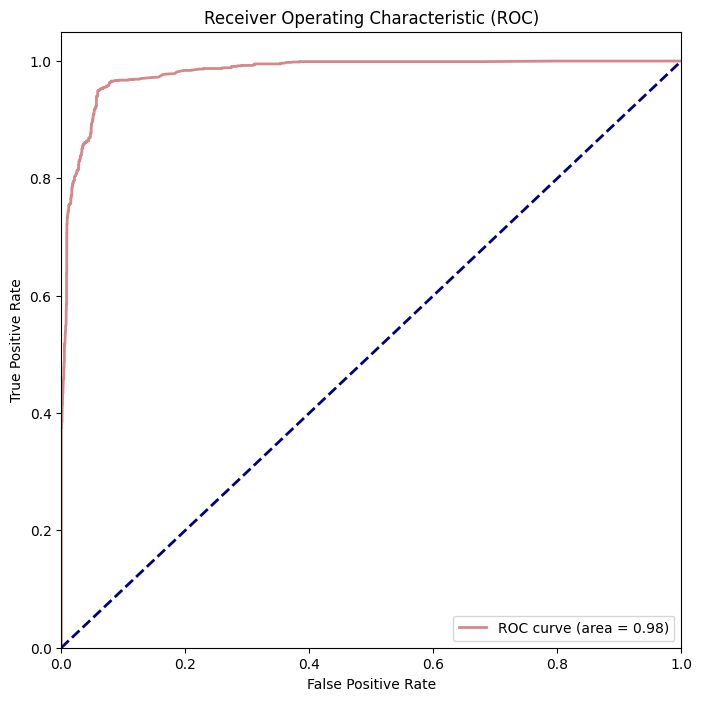

Area Under the Curve (AUC): 0.9812853725183025


In [ ]:
y_train_proba = cross_val_predict(random_forest, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

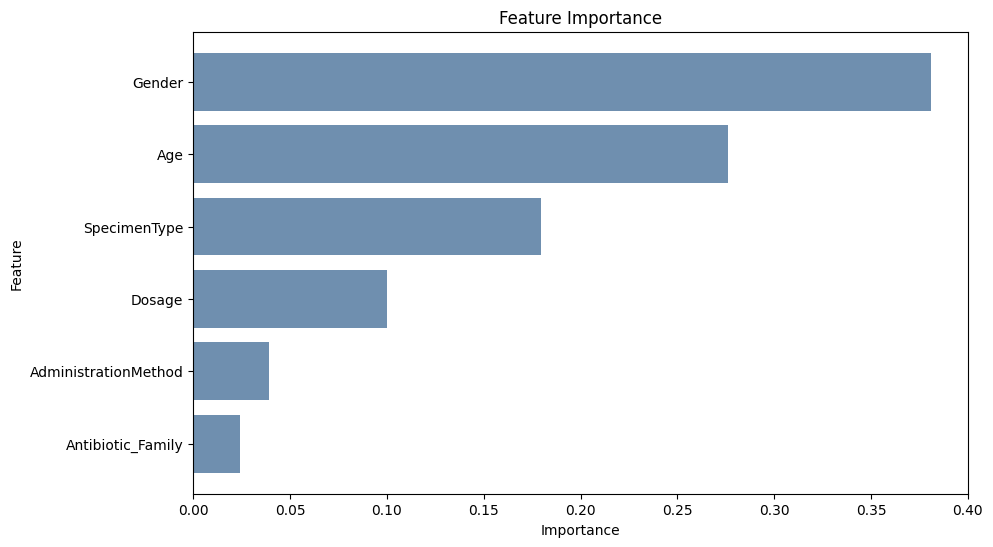

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


#**Acinetobacter baumannii**

In [ ]:
data_m = data[data['Bacteria'] == 'Acinetobacter baumannii']
df = pd.DataFrame(data_m)
df = df.applymap(str)

values_to_remove =['Anticoagulants', 'Penicillins', 'Oxazolidinones','Marcolides']
# Drop rows where any column has any of the specified values
df = df[~df.isin(values_to_remove).any(axis=1)]

print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult', 'Bacteria'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9322
S     907
Name: count, dtype: int64
Cross-validation scores: [0.97507331 0.9799609  0.97800587 0.97360704 0.96919315]
Mean accuracy: 0.9752
Standard deviation of scores: 0.0037
Accuracy on unseen test data: 0.9775171065493646
Confusion matrix:
 [[1863    2]
 [  44  137]]
Precision: 0.9856115107913669
Recall: 0.7569060773480663
F1-score: 0.8562500000000001
Sensitivity: 0.7569060773480663
Specificity: 0.9989276139410188
AuROC: 0.9880334157865892
Matthews Correlation Coefficient (MCC): 0.8529473132899538


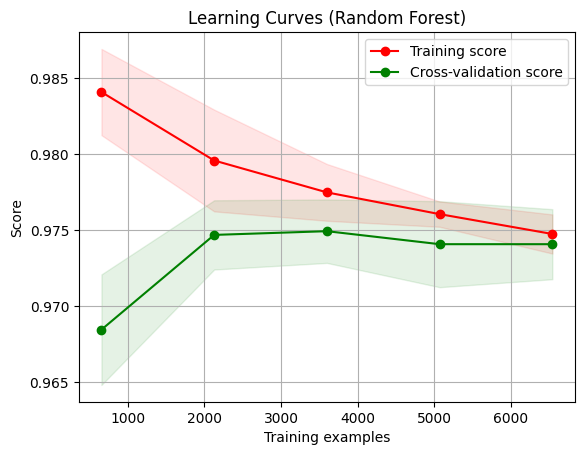

In [ ]:
# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Random Forest)"
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(random_forest, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()


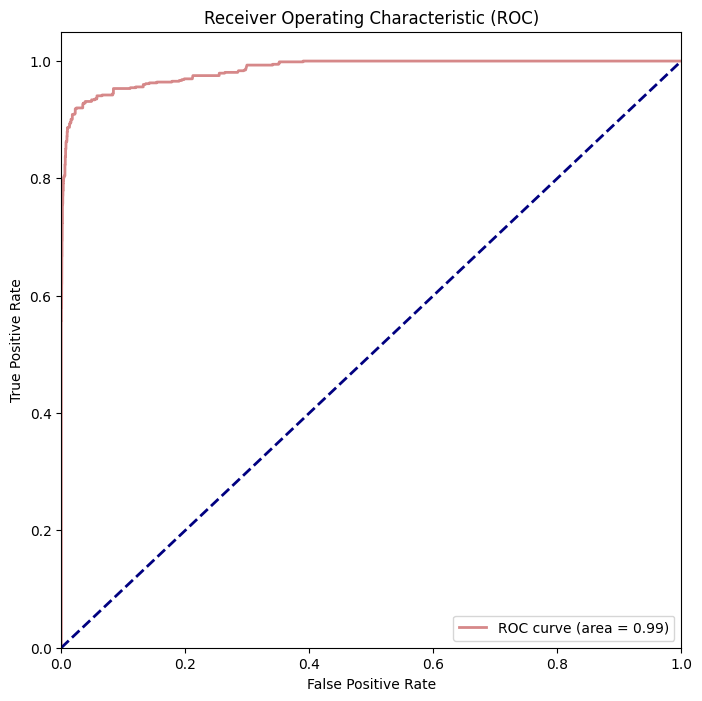

Area Under the Curve (AUC): 0.9852878265138861


In [ ]:
y_train_proba = cross_val_predict(random_forest, X_train, y_train, cv=stratified_kfold, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='#d68889', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("Area Under the Curve (AUC):",roc_auc)

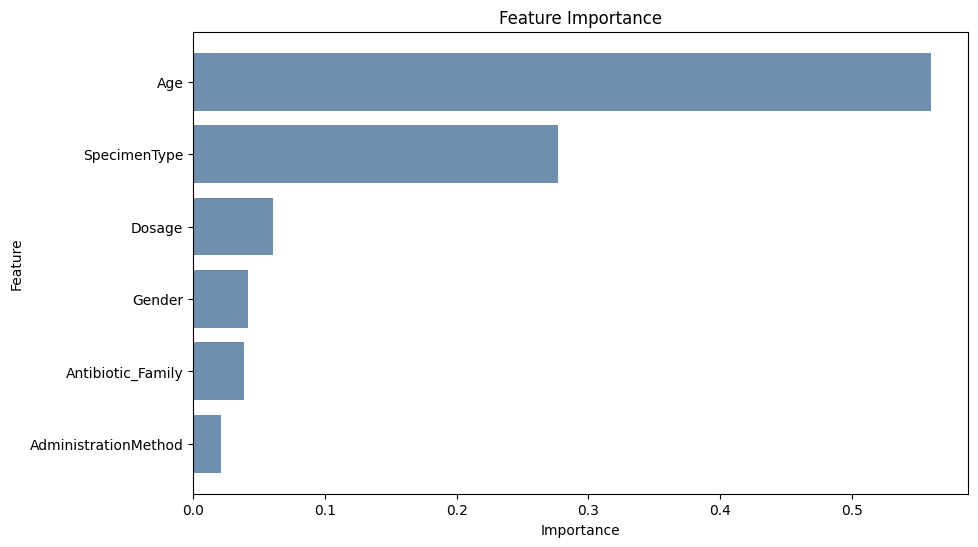

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6F8FAF')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


# **Escherichia coli and Antibiotic Family**

In [43]:
kly=data[data['Bacteria']=='Escherichia coli']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     21640
Macrolides        11201
Cephalosporins     6408
Anticoagulants      213
Penicillins          48
Oxazolidinones       45
Name: count, dtype: int64

## **Escherichia coli and Glycopeptides**

In [ ]:
data_m = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    17858
R     3782
Name: count, dtype: int64
Cross-validation scores: [0.94454713 0.93900185 0.93391867 0.93414972 0.93207024]
Mean accuracy: 0.9367
Standard deviation of scores: 0.0045
Accuracy on unseen test data: 0.9438539741219963
Confusion matrix:
 [[ 559  197]
 [  46 3526]]
Precision: 0.9470856835885039
Recall: 0.9871220604703248
F1-score: 0.9666895133653188
Sensitivity: 0.9871220604703248
Specificity: 0.7394179894179894
AuROC: 0.9744026141002624
Matthews Correlation Coefficient (MCC): 0.7955216013148223


## **Escherichia coli and Macrolides**

In [32]:
data_m = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9181
S    2020
Name: count, dtype: int64
Cross-validation scores: [0.94288264 0.946875   0.934375   0.93973214 0.94330357]
Mean accuracy: 0.9414
Standard deviation of scores: 0.0042
Accuracy on unseen test data: 0.9393128067826862
Confusion matrix:
 [[1798   39]
 [  97  307]]
Precision: 0.8872832369942196
Recall: 0.7599009900990099
F1-score: 0.8186666666666668
Sensitivity: 0.7599009900990099
Specificity: 0.9787697332607512
AuROC: 0.9643548187154045
Matthews Correlation Coefficient (MCC): 0.7858750311951558


## **Escherichia coli and Cephalosporins**

In [36]:
data_m = data[(data['Bacteria'] == 'Escherichia coli') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    4531
R    1877
Name: count, dtype: int64
Cross-validation scores: [0.92277691 0.92823713 0.94929797 0.9047619  0.93989071]
Mean accuracy: 0.9290
Standard deviation of scores: 0.0152
Accuracy on unseen test data: 0.9477379095163807
Confusion matrix:
 [[315  61]
 [  6 900]]
Precision: 0.9365244536940687
Recall: 0.9933774834437086
F1-score: 0.96411355115158
Sensitivity: 0.9933774834437086
Specificity: 0.8377659574468085
AuROC: 0.9860166854539477
Matthews Correlation Coefficient (MCC): 0.8734132844781362


#**Klebsiella pneumoniae and Antibiotic Family**

In [45]:
x=data[data['Bacteria']=='Klebsiella pneumoniae']
x.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     18347
Macrolides         6042
Cephalosporins     3711
Oxazolidinones      252
Anticoagulants       73
Penicillins          52
Name: count, dtype: int64

## **Klebsiella pneumoniae and Glycopeptides**

In [ ]:
data_m = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    14254
R     4093
Name: count, dtype: int64
Cross-validation scores: [0.91117166 0.91416894 0.91251022 0.9250477  0.9073317 ]
Mean accuracy: 0.9140
Standard deviation of scores: 0.0059
Accuracy on unseen test data: 0.9059945504087193
Confusion matrix:
 [[ 497  322]
 [  23 2828]]
Precision: 0.8977777777777778
Recall: 0.9919326552086987
F1-score: 0.9425095817363772
Sensitivity: 0.9919326552086987
Specificity: 0.6068376068376068
AuROC: 0.9796005857037074
Matthews Correlation Coefficient (MCC): 0.7148975912510354


## **Klebsiella pneumoniae and Cephalosporins**

In [49]:
data_m = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Cephalosporins')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    2878
R     833
Name: count, dtype: int64
Cross-validation scores: [0.9717362  0.96630728 0.98787062 0.96361186 0.97843666]
Mean accuracy: 0.9736
Standard deviation of scores: 0.0088
Accuracy on unseen test data: 0.9784656796769852
Confusion matrix:
 [[156  11]
 [  5 571]]
Precision: 0.9810996563573883
Recall: 0.9913194444444444
F1-score: 0.9861830742659758
Sensitivity: 0.9913194444444444
Specificity: 0.9341317365269461
AuROC: 0.9934142132401863
Matthews Correlation Coefficient (MCC): 0.937666846870799


##**Klebsiella pneumoniae and Macrolides**



In [50]:
data_m = data[(data['Bacteria'] == 'Klebsiella pneumoniae') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    5630
R     412
Name: count, dtype: int64
Cross-validation scores: [0.97684036 0.98842018 0.98178808 0.97682119 0.98096026]
Mean accuracy: 0.9810
Standard deviation of scores: 0.0043
Accuracy on unseen test data: 0.9917287014061208
Confusion matrix:
 [[  73    9]
 [   1 1126]]
Precision: 0.9920704845814978
Recall: 0.9991126885536823
F1-score: 0.9955791335101679
Sensitivity: 0.9991126885536823
Specificity: 0.8902439024390244
AuROC: 0.9849643993334344
Matthews Correlation Coefficient (MCC): 0.9328912540490296


#**Pseudomonas aeruginosa and Antibiotic Family**

In [46]:
kly=data[data['Bacteria']=='Pseudomonas aeruginosa']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     10516
Cephalosporins     1872
Macrolides         1085
Oxazolidinones      114
Anticoagulants       27
Penicillins          12
Name: count, dtype: int64

##**Pseudomonas aeruginosa and Glycopeptides**

In [55]:
data_m = data[(data['Bacteria'] == 'Pseudomonas aeruginosa') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

#Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

#Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    947
R    138
Name: count, dtype: int64
Cross-validation scores: [1.         0.99078341 0.98617512 0.99078341 0.99539171]
Mean accuracy: 0.9926
Standard deviation of scores: 0.0047
Accuracy on unseen test data: 0.9953917050691244
Confusion matrix:
 [[ 28   0]
 [  1 188]]
Precision: 1.0
Recall: 0.9947089947089947
F1-score: 0.9973474801061007
Sensitivity: 0.9947089947089947
Specificity: 1.0
AuROC: 0.9994331065759637
Matthews Correlation Coefficient (MCC): 0.9800044308811138


##**Pseudomonas aeruginosa and Cephalosporins**

In [ ]:
data_m = data[(data['Bacteria'] == 'Pseudomonas aeruginosa') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
S    8682
R    1834
Name: count, dtype: int64
Cross-validation scores: [0.91397338 0.91012839 0.92154066 0.92154066 0.91868759]
Mean accuracy: 0.9172
Standard deviation of scores: 0.0045
Accuracy on unseen test data: 0.9234790874524715
Confusion matrix:
 [[ 207  160]
 [   1 1736]]
Precision: 0.9156118143459916
Recall: 0.9994242947610823
F1-score: 0.9556840077071291
Sensitivity: 0.9994242947610823
Specificity: 0.5640326975476839
AuROC: 0.9680318881092554
Matthews Correlation Coefficient (MCC): 0.7163790555188828


# **Staphylococcus (coagulase-negative)   and Anitbiotic Family**

In [47]:
kly=data[data['Bacteria']=='Staphylococcus (coagulase-negative)']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     7596
Macrolides        4045
Cephalosporins     907
Penicillins         16
Name: count, dtype: int64

##**Staphylococcus (coagulase-negative) and Glycopeptides**

In [53]:
data_m = data[(data['Bacteria'] == 'Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    4753
S    2843
Name: count, dtype: int64
Cross-validation scores: [0.95657895 0.9479921  0.94865043 0.96181698 0.95325872]
Mean accuracy: 0.9537
Standard deviation of scores: 0.0051
Accuracy on unseen test data: 0.9585526315789473
Confusion matrix:
 [[916  35]
 [ 28 541]]
Precision: 0.9392361111111112
Recall: 0.9507908611599297
F1-score: 0.9449781659388647
Sensitivity: 0.9507908611599297
Specificity: 0.9631966351209253
AuROC: 0.9870527554937084
Matthews Correlation Coefficient (MCC): 0.9117786260888723


##**Staphylococcus (coagulase-negative) and Macrolides**

In [54]:
data_m = data[(data['Bacteria'] == 'Staphylococcus (coagulase-negative)') & (data['Antibiotic_Family'] == 'Macrolides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    3383
S     662
Name: count, dtype: int64
Cross-validation scores: [0.98516687 0.98269468 0.98887515 0.98516687 0.99011125]
Mean accuracy: 0.9864
Standard deviation of scores: 0.0027
Accuracy on unseen test data: 0.9876390605686032
Confusion matrix:
 [[677   0]
 [ 10 122]]
Precision: 1.0
Recall: 0.9242424242424242
F1-score: 0.9606299212598425
Sensitivity: 0.9242424242424242
Specificity: 1.0
AuROC: 0.999406920012533
Matthews Correlation Coefficient (MCC): 0.9543527198294571


#**Acinetobacter baumannii and Antibiotic Family**

In [48]:
kly=data[data['Bacteria']=='Acinetobacter baumannii']
kly.Antibiotic_Family.value_counts()

Antibiotic_Family
Glycopeptides     9739
Cephalosporins     424
Oxazolidinones     144
Macrolides          66
Anticoagulants      39
Penicillins         17
Name: count, dtype: int64

## **Acinetobacter baumannii and Glycopeptides**

In [ ]:
data_m = data[(data['Bacteria'] == 'Acinetobacter baumannii') & (data['Antibiotic_Family'] == 'Glycopeptides')]
df = pd.DataFrame(data_m)
df = df.applymap(str)


print(df['SensitivityResult'].value_counts())
# Encode categorical data
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column dtype is 'object' (categorical)
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['SensitivityResult','Bacteria','Antibiotic_Family'])
y = df['SensitivityResult']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       bootstrap=True,
                                       random_state=42)

# Perform cross-validation on the training set
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X, y, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation of scores: {:.4f}".format(cv_scores.std()))

# Fit the model on the full training set
random_forest.fit(X_train, y_train)

# Evaluate the trained model on the test set
test_accuracy = random_forest.score(X_test, y_test)
print("Accuracy on unseen test data:", test_accuracy)

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_predictions)
print("Confusion matrix:\n", conf_matrix_test)

# Calculate sensitivity and specificity
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

# Calculate precision, recall, and F1-score based on test set predictions
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_score_test = f1_score(y_test, test_predictions)

# Calculate AuROC based on test set predictions
test_predictions_proba = random_forest.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, test_predictions_proba)

# Print the metrics based on test set predictions
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("AuROC:", auc_roc_test)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, test_predictions)
print("Matthews Correlation Coefficient (MCC):", mcc)

SensitivityResult
R    9003
S     736
Name: count, dtype: int64
Cross-validation scores: [0.9825462  0.9825462  0.98151951 0.97535934 0.97791474]
Mean accuracy: 0.9800
Standard deviation of scores: 0.0029
Accuracy on unseen test data: 0.9799794661190965
Confusion matrix:
 [[1797    4]
 [  35  112]]
Precision: 0.9655172413793104
Recall: 0.7619047619047619
F1-score: 0.8517110266159695
Sensitivity: 0.7619047619047619
Specificity: 0.9977790116601888
AuROC: 0.9925211617128805
Matthews Correlation Coefficient (MCC): 0.8479234471117868
